## Imports:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Create_Dataset import create_dataset
import cv2 as cv

In [32]:
image = cv.imread('image.jpg')

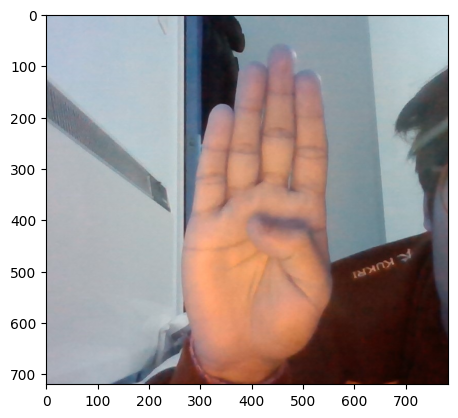

In [33]:
plt.imshow(image)

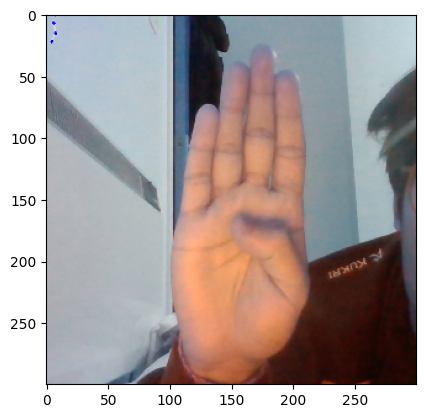

In [36]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils

mp_hands = mp.solutions.hands
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
    results = hands.process(cv.cvtColor(image, cv.COLOR_BGR2RGB))

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_world_landmarks:
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

plt.imshow(cv.resize(image, (300, 300)))

# # get world coordinates
# landmarks = results.multi_hand_landmarks[0]
# landmarks = [[lm.x, lm.y, lm.z] for lm in landmarks.landmark]

# # get image coordinates
# landmarks_image = results.multi_hand_landmarks[0]
# landmarks_image = [[lm.x, lm.y] for lm in landmarks_image.landmark]



## Reading the data

In [5]:
data = 'C:\\Users\\Aship\\PycharmProjects\\SignLanguageDetection\\SignLanguageDetection\\data'
x_train, x_test, y_train, y_test, d = create_dataset(data)

In [6]:

y_train[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

numpy.ndarray

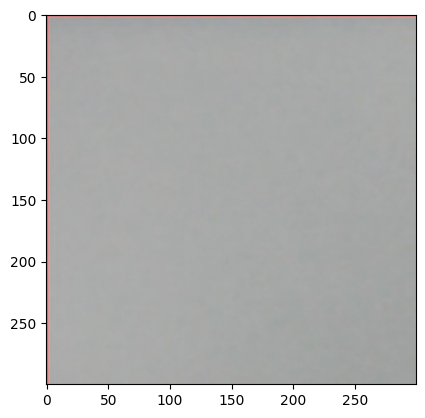

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[600])
type(x_train)

In [8]:
import mediapipe as mp
import cv2
mpHands = mp.solutions.hands
mpDraw = mp.solutions.drawing_utils
hands = mpHands.Hands(static_image_mode=True, max_num_hands=1,min_detection_confidence=0.000001)


def get_coords(image):
    # image = cv2.imread(image)
    # plt.imshow(image)
    image = image.astype('uint8')
    image = cv2.flip(image, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
    # print(image)
    
    results = hands.process(image)
    coords = []
    if not results.multi_hand_world_landmarks:
        coords = None
        
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_world_landmarks:
            # plt.imshow(image)
            for landmark in hand_landmarks.landmark:
                coords.extend([landmark.x, landmark.y,landmark.z])
    return coords

In [9]:
import mediapipe as mp
import cv2

x_train_coords = []
for image in x_train:
    x_train_coords.append(get_coords(image))

In [10]:
idx_to_delete = []
for idx, coords in enumerate(x_train_coords):
    if coords == None:
        idx_to_delete.append(idx)

In [11]:
type(x_train_coords), type(list(y_test))

(list, list)

In [12]:
len(list(y_train))

5427

In [13]:
y_train = list(y_train)

In [14]:
x_train_coords = [coords for idx, coords in enumerate(x_train_coords) if idx not in idx_to_delete]

y_train = [y for idx, y in enumerate(y_train) if idx not in idx_to_delete]

In [15]:
len(x_train_coords), len(y_train)

(4099, 4099)

In [16]:
import pandas as pd


In [17]:
x_test_coords = []
for image in x_test:
    x_test_coords.append(get_coords(image))

idx_to_delete = []
for idx, coords in enumerate(x_test_coords):
    if coords == None:
        idx_to_delete.append(idx)

y_test = list(y_test)

x_test_coords = [coords for idx, coords in enumerate(x_test_coords) if idx not in idx_to_delete]
y_test = [y for idx, y in enumerate(y_test) if idx not in idx_to_delete]


In [18]:
np.set_printoptions(suppress=True, precision=8)
np_xtrain_coords = np.array(x_train_coords)
np_x_test_coords = np.array(x_test_coords)

In [19]:
df = pd.DataFrame(np_x_test_coords)
df.to_csv('x_test.csv',index=False, header=False, float_format="%.8f")

In [20]:
df = pd.DataFrame(np_xtrain_coords)
df.to_csv('x_train.csv',index=False, header=False, float_format="%.8f")

In [21]:
df = pd.DataFrame(np.array(y_test))
df.to_csv('y_test.csv',index=False, header=False, float_format="%.8f")

df = df = pd.DataFrame(np.array(y_train))
df.to_csv('y_train.csv',index=False, header=False, float_format="%.8f")

## EDA - Exploratory Data Analysis

Below shows the shape of an individual image within the dataset.

In [24]:
y_train = pd.read_csv('y_train.csv', header=None)
x_train = pd.read_csv('x_train.csv', header=None)
# sum for each column
len(x_train), len(y_train)
y_train.sum(axis=0)


0       0.0
1      18.0
2     210.0
3      85.0
4     148.0
5     111.0
6     211.0
7     179.0
8     187.0
9     175.0
10    170.0
11    211.0
12    187.0
13    164.0
14    144.0
15    117.0
16    115.0
17    144.0
18    181.0
19    136.0
20     92.0
21    171.0
22    191.0
23    211.0
24    152.0
25    199.0
26    190.0
dtype: float64

## Training  - CNN

## Testing and Evaluation

## OpenCV and using computor vision